In [1]:
import numpy as np
import glob
import skimage.io as io
import os.path
import tensorflow as tf

<class 'numpy.ndarray'>
(420, 580)


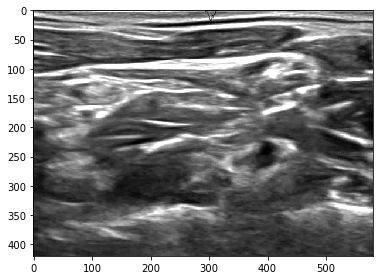

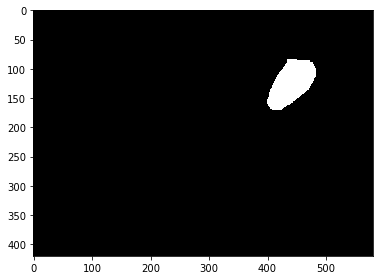

In [2]:
%matplotlib inline

origin_images = [img for img in glob.glob("train_subset/*.tif") if 'mask' not in img]

def fimg_to_fmask(img_path):
    # convert an image file path into a corresponding mask file path 
    dirname, basename = os.path.split(img_path)
    maskname = basename.replace(".tif", "_mask.tif")
    return os.path.join(dirname, maskname)

paired_images = [(img, fimg_to_fmask(img)) for img in origin_images]

# check an image instance
img = io.imread('train_subset/1_1.tif')
mask =io.imread('train_subset/1_1_mask.tif')
print(type(img))
print(img.shape)
io.imshow(img)
io.show()
io.imshow(mask)
io.show()

86 82


C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


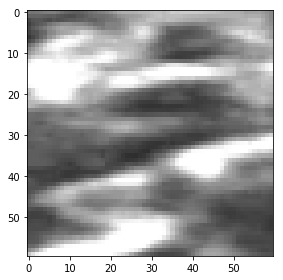

In [3]:
from skimage.transform import resize

# extract the masked region in image and resize to [60, 60] for classification
def masked_region(img, mask):
    xreg = [i for i in range(420) for j in range(580) if mask[i][j] == 255]
    if xreg == []: return []
    yreg = [j for j in range(580) for i in range(420) if mask[i][j] == 255]

    xmin = min(xreg)
    xmax = max(xreg)
    ymin = min(yreg)
    ymax = max(yreg)
    
    print(xmax-xmin, ymax-ymin)
    
    return resize(img[xmin:xmax, ymin:ymax], (60, 60))

resized_img_masked = masked_region(img, mask)



if len(resized_img_masked) > 0:
    io.imshow(resized_img_masked)
else:
    print("image has no mask")

In [7]:
origin_images = [img for img in glob.glob("train_subset/*.tif") if 'mask' not in img]

def fimg_to_fmask(img_path):
    # convert an image file path into a corresponding mask file path 
    dirname, basename = os.path.split(img_path)
    maskname = basename.replace(".tif", "_mask.tif")
    return os.path.join(dirname, maskname)

paired_images = [(img, fimg_to_fmask(img)) for img in origin_images]

print("number of image segmentation pairs: ", len(paired_images))

number of image segmentation pairs:  599


In [9]:
def images_split_train(paired_images):
    count_no_mask = 1
    count_mask = 1
    count_fcn = 1
    for raw_img, raw_mask in paired_images:
        img = io.imread(raw_img)
        mask = io.imread(raw_mask) / 255
        for i in range(6):
            for j in range(5):
                small_img = img[i*70:(i+1)*70, j*116:(j+1)*116]
                small_mask = mask[i*70:(i+1)*70, j*116:(j+1)*116]
                io.imsave("data_fcn/train/images/" + str(count_fcn) + ".jpg", small_img / 255)
                io.imsave("data_fcn/train/masks/" + str(count_fcn) + "_mask.jpg", small_mask)
                count_fcn += 1
                #if np.sum(mask[i*70:(i+1)*70, j*116:(j+1)*116]) >= 400:
                 #   io.imsave("data_simple_cnn/train/mask/" + str(count_mask) + "_mask.jpg", small_img)
                  #  count_mask += 1
                #else:
                 #   io.imsave("data_simple_cnn/train/no_mask/" + str(count_no_mask) + ".jpg", small_img)
                  #  count_no_mask += 1
    print("Finished splitting and saving " + str(count_raw) + " images and segmentations")
    
images_split_train(paired_images[:480])

C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/train/masks/1_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/train/masks/2_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/train/masks/3_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/train/masks/4_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\chali\Anaconda2\en

NameError: name 'count_raw' is not defined

In [13]:
def images_split_validation(paired_images):
    count_no_mask = 1
    count_mask = 1
    count_fcn = 1
    for raw_img, raw_mask in paired_images:
        img = io.imread(raw_img)
        mask = io.imread(raw_mask) / 255
        for i in range(6):
            for j in range(5):
                small_img = img[i*70:(i+1)*70, j*116:(j+1)*116]
                small_mask = mask[i*70:(i+1)*70, j*116:(j+1)*116]
                io.imsave("data_fcn/validation/images/" + str(count_fcn) + ".jpg", small_img / 255)
                io.imsave("data_fcn/validation/masks/" + str(count_fcn) + "_mask.jpg", small_mask)
                count_fcn += 1
                if np.sum(mask[i*70:(i+1)*70, j*116:(j+1)*116]) >= 400:
                    io.imsave("data_simple_cnn/validation/mask/" + str(count_mask) + "_mask.jpg", small_img)
                    count_mask += 1
                else:
                    io.imsave("data_simple_cnn/validation/no_mask/" + str(count_no_mask) + ".jpg", small_img)
                    count_no_mask += 1
images_split_validation(paired_images[480:])

C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/validation/masks/1_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/validation/masks/2_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/validation/masks/3_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\chali\Anaconda2\envs\aind-dog\lib\site-packages\skimage\io\_io.py:132: UserWarning: data_fcn/validation/masks/4_mask.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\User

In [14]:
img = io.imread("data_simple_cnn/train/no_mask/1.jpg")
print(img.shape)

(70, 116)
